In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [48]:
df = pd.read_csv("titanic.csv")

In [49]:
len(df)

1310

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


<AxesSubplot:>

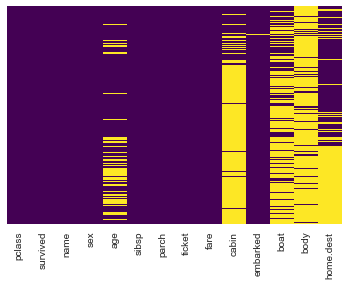

In [51]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='survived', ylabel='count'>

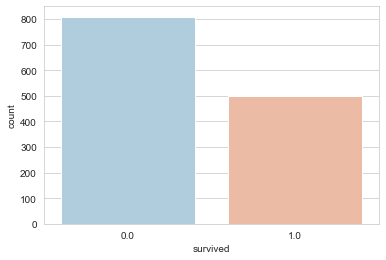

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df, palette="RdBu_r")

<AxesSubplot:xlabel='survived', ylabel='count'>

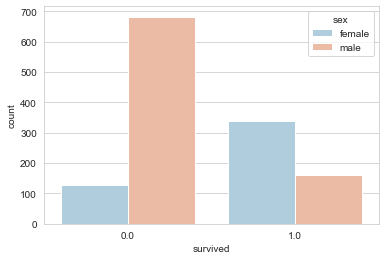

In [53]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=df, palette="RdBu_r")

<AxesSubplot:xlabel='survived', ylabel='count'>

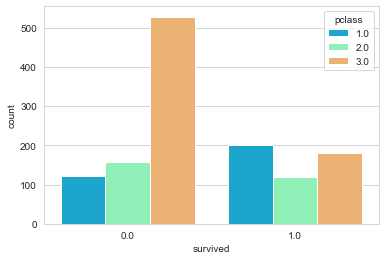

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=df, palette="rainbow")

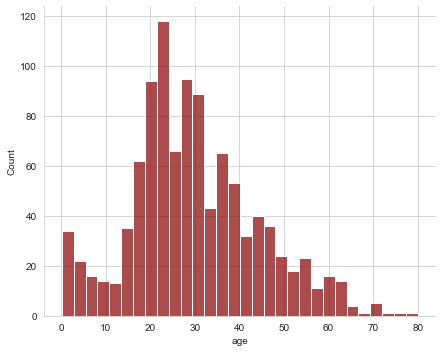

In [55]:
sns.displot(data=df, x=df['age'].dropna(), kde=False, fill=True, color='darkred', bins=30, height=5, aspect=1.25, alpha = 0.7)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

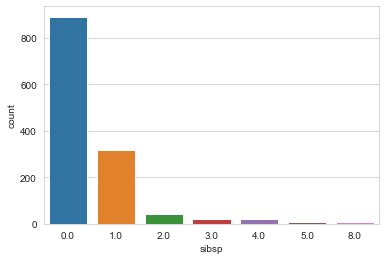

In [56]:
sns.countplot(x='sibsp',data=df)

<AxesSubplot:>

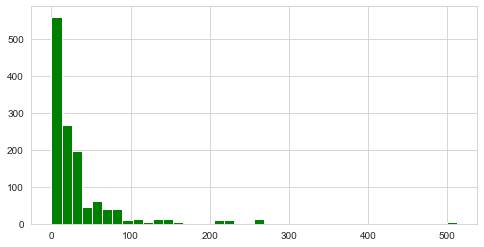

In [57]:
df['fare'].hist(color='green',bins=40,figsize=(8,4))

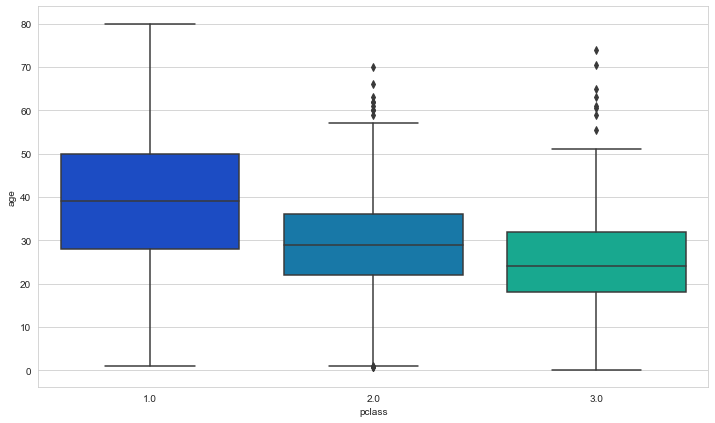

In [58]:
plt.figure(figsize=(12, 7))
bp = sns.boxplot(x='pclass',y='age',data=df,palette='winter')

In [59]:
medians = df.groupby(['pclass'])['age'].median()
medians

pclass
1.0    39.0
2.0    29.0
3.0    24.0
Name: age, dtype: float64

In [60]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
       if Pclass == 1:
            return 39
       elif Pclass == 2:
            return 29
       else:
            return 24
    else:
        return Age

In [61]:
df['age'] = df[['age','pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

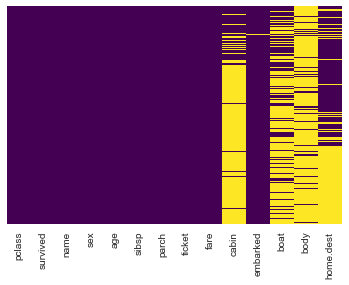

In [62]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1310 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [64]:
df.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1,inplace=True)

In [65]:
df.dropna(inplace=True)

In [66]:
sex = pd.get_dummies(df['sex'],drop_first=True)
embark = pd.get_dummies(df['embarked'],drop_first=True)

In [67]:
df.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)

In [74]:
df = pd.concat([df,sex,embark],axis=1)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   float64
 1   survived  1306 non-null   float64
 2   age       1306 non-null   float64
 3   sibsp     1306 non-null   float64
 4   parch     1306 non-null   float64
 5   fare      1306 non-null   float64
 6   male      1306 non-null   uint8  
 7   Q         1306 non-null   uint8  
 8   S         1306 non-null   uint8  
dtypes: float64(6), uint8(3)
memory usage: 75.2 KB


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('survived',axis=1),
    df['survived'], test_size=0.30,
    random_state=101)

print(len(X_train))
print(len(X_test))

914
392


In [99]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print("Model score: %s"%(model.score(X_test, y_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       247
         1.0       0.72      0.70      0.71       145

    accuracy                           0.79       392
   macro avg       0.78      0.77      0.77       392
weighted avg       0.79      0.79      0.79       392

Model score: 0.7908163265306123


In [100]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=40)
rfmodel.fit(X_train, y_train)

predictions = rfmodel.predict(X_test)
print(classification_report(y_test, predictions))
print("Model score: %s"%(rfmodel.score(X_test, y_test)))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       247
         1.0       0.75      0.72      0.74       145

    accuracy                           0.81       392
   macro avg       0.80      0.79      0.79       392
weighted avg       0.81      0.81      0.81       392

Model score: 0.8086734693877551
